# Loading the Dataset from Kaggle.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping the File

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Importing the basic Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
image_height, image_width = 256, 256
batch_size = 32

# Splitting the Data into Training and Validation of Batch Size 32 using the Image Generator

In [5]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (image_height, image_width)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


# Visualizing A single  Image form each Directory or Class

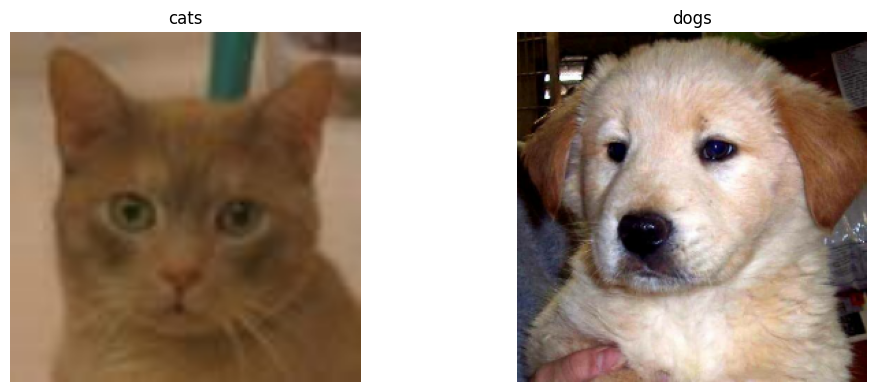

In [7]:
#Visualize Image

plt.figure(figsize=(12,10))
for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(2,2 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


# Model Building

In [8]:
from tensorflow.keras.layers import BatchNormalization , Dropout , Input
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal

In [ ]:
# Model Building

num_classes = len(class_names)

# CNN Model

model = Sequential()

model.add(Input(shape=(image_height,image_width,3)))
model.add(Rescaling(1./255))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', kernel_regularizer=l2(0.003)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu', kernel_regularizer=l2(0.003)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu', kernel_regularizer=l2(0.003)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size = (3,3), padding = 'valid', activation = 'relu', kernel_regularizer=l2(0.003)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.003)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.003)))
model.add(Dense(1, activation = 'sigmoid'))



### Model Compilization

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              

 Total params: 6,821,825 (26.02 MB)

 Trainable params: 6,820,609 (26.02 MB)

 Non-trainable params: 1,216 (4.75 KB)

# Model Training without Pretrained Model

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 87ms/step - accuracy: 0.6410 - loss: 2.1792 - val_accuracy: 0.6776 - val_loss: 1.1294
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.7430 - loss: 1.0147 - val_accuracy: 0.5436 - val_loss: 1.2306
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.7685 - loss: 0.9100 - val_accuracy: 0.5664 - val_loss: 1.1874
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.7879 - loss: 0.8341 - val_accuracy: 0.7124 - val_loss: 0.9869
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.8133 - loss: 0.8850 - val_accuracy: 0.7538 - val_loss: 0.9499
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.8411 - loss: 0.8013 - val_accuracy: 0.5502 - val_loss: 1.8669
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8541 - loss: 0.7795 - val_accuracy: 0.7872 - val_loss: 0.8496
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.8656 - loss: 0.7804 - 

# Visualizing the Training vs Validation with respect to loss and accuracy over the Epochs.

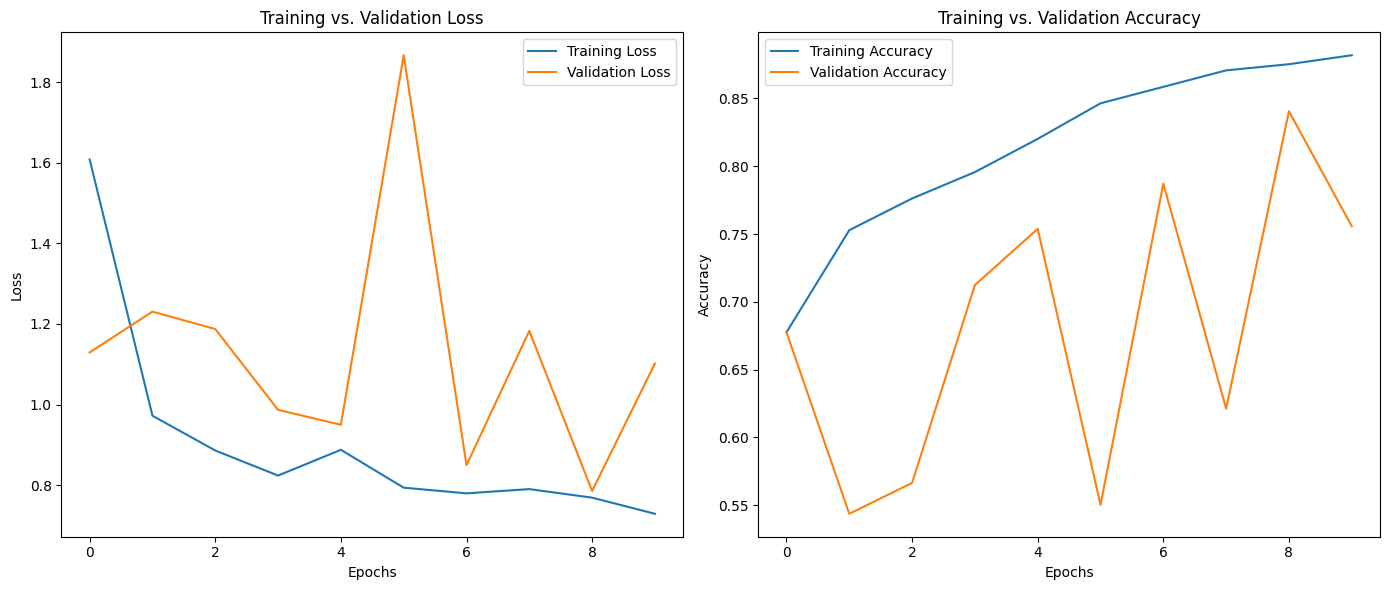

In [ ]:
# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Transfer Learning

### VGG16 Model

In [9]:
from keras.applications.vgg16 import VGG16

In [10]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(image_height,image_width,3)
)

# Freezing the top 4 Convolution layer of VGG16 Model

In [11]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [12]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

# Transfer Learning Model Architecture

In [13]:
#Model Architecture

trans_model = Sequential()

trans_model.add(Input(shape=(image_height,image_width,3)))
trans_model.add(Rescaling(1./255))

trans_model.add(conv_base)

trans_model.add(Flatten())
trans_model.add(Dense(128, activation = 'relu'))
trans_model.add(BatchNormalization())
trans_model.add(Dropout(0.25))
trans_model.add(Dense(64, activation = 'relu'))
trans_model.add(Dense(1, activation = 'sigmoid'))


In [14]:
trans_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,917,953 (72.17 MB)

 Trainable params: 11,282,433 (43.04 MB)

 Non-trainable params: 7,635,520 (29.13 MB)

In [15]:
trans_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Model training with Transfer Learning(Fine Tuning)

In [16]:
history1 = trans_model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 248ms/step - accuracy: 0.8708 - loss: 0.2966 - val_accuracy: 0.9214 - val_loss: 0.1980
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 233ms/step - accuracy: 0.9491 - loss: 0.1233 - val_accuracy: 0.9384 - val_loss: 0.1743
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 235ms/step - accuracy: 0.9627 - loss: 0.0987 - val_accuracy: 0.9584 - val_loss: 0.1070
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 261ms/step - accuracy: 0.9672 - loss: 0.0864 - val_accuracy: 0.9470 - val_loss: 0.1592
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 232ms/step - accuracy: 0.9763 - loss: 0.0645 - val_accuracy: 0.9494 - val_loss: 0.1403
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 258ms/step - accuracy: 0.9805 - loss: 0.0501 - val_accuracy: 0.9606 - val_loss: 0.1033
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 258ms/step - accuracy: 0.9850 - loss: 0.0425 - val_accuracy: 0.9672 - val_loss: 0.1044
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 258ms/step - accuracy: 0.9865 -

# Visualizing the Training vs Validation with respect to loss and accuracy over the Epochs.

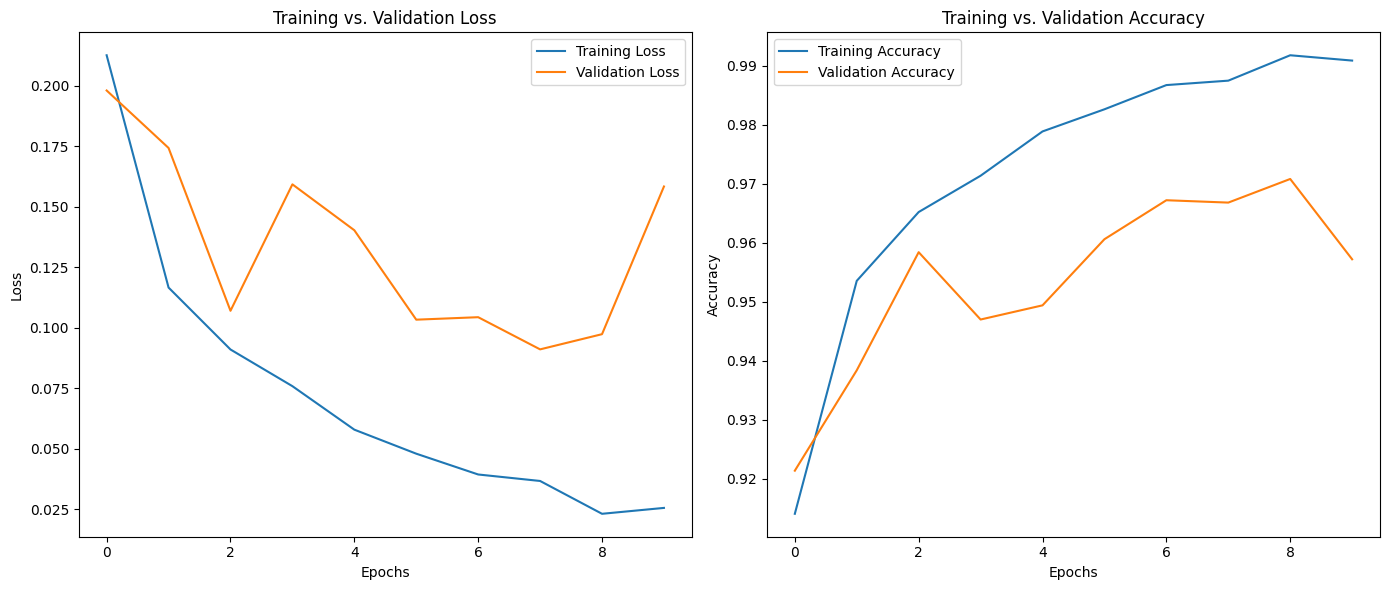

In [17]:
# Extract loss values from the history object
trans_training_loss = history1.history['loss']
trans_validation_loss = history1.history['val_loss']

# Extract accuracy values from the history object
trans_training_accuracy = history1.history['accuracy']
trans_validation_accuracy = history1.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(trans_training_loss, label='Training Loss')
plt.plot(trans_validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(trans_training_accuracy, label='Training Accuracy')
plt.plot(trans_validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Performing the prediction using a custom image

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [36]:
dog = image.load_img('/content/dog.jpeg', target_size=(image_height,image_width))
dog_array = image.img_to_array(dog)
dog_array = np.expand_dims(dog_array, axis=0)
dog_array = preprocess_input(dog_array)

In [26]:
cat = image.load_img('/content/cat.jpeg', target_size=(image_height,image_width))
cat_array = image.img_to_array(cat)
cat_array = np.expand_dims(cat_array, axis=0)
cat_array = preprocess_input(cat_array)

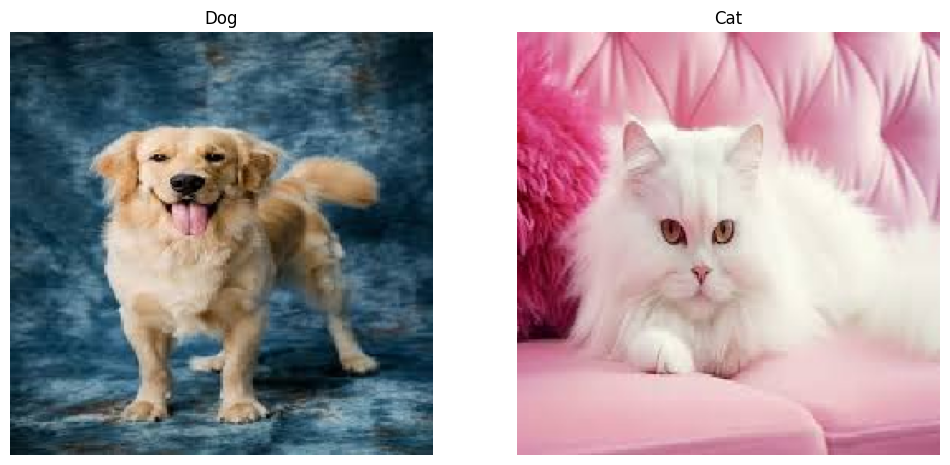

In [35]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.title('Dog')
plt.imshow(dog)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Cat')
plt.imshow(cat)
plt.axis('off')

plt.show()

In [28]:
dog_pred = trans_model.predict(dog_array)
cat_pred = trans_model.predict(cat_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [29]:
print(dog_pred)
print(cat_pred)

[[1.]]
[[0.00044145]]


# Prediction Label
## 1-> Dog
## 0-> Cat